# Prediction of 2D and 3D Covalent Organic Frameworks (COFs) for Methane Storage Application
## Yi-Chia Lin (Grace)

## Introduction

The overarching goal of the project is to use properties of COFs, such as porosity, density, surface area, pore size, as well as densities of carbon, hydrogen, nitrogen, and oxygen, to predict the deliverable capacity for methane storage by multiple linear regression.

#### Covalent Organic Frameworks (COF)s
* Nanoporous crystalline materials
* Attractive candidates for gas adsorption applications.

#### Features:
* Void fraction (Porosity)
* Density
* Surface area
* Largest included sphere diameter (pore size)
* Supercell volume, number of carbon, number of hydrogen, number of nitrogen, number of oxygen (Calculate densities)
* ***Deliverable capacity***

## Import DataFrames

In [1]:
using CSV, DataFrames, PyPlot, Printf, Statistics, LaTeXStrings, ScikitLearn

PyPlot.matplotlib.style.use("ggplot")
ENV["COLUMNS"] = 50000

50000

In [2]:
df = CSV.read("properties_new.csv", copycols=true)
first(df, 5)

,dimensions,bond_type,name,void_fraction,supercell_volume,density,heat desorption high P [kJ/mol],heat desorption error high P [kJ/mol],absolute methane uptake high P [molec/unit cell],absolute methane uptake error high P [molec/unit cell],absolute methane uptake high P [mol/kg],absolute methane uptake error high P [mol/kg],excess methane uptake high P [molec/unit cell],excess methane uptake error high P [molec/unit cell],excess methane uptake high P [mol/kg],excess methane uptake error high P [mol/kg],heat desorption low P [kJ/mol],heat desorption error low P [kJ/mol],absolute methane uptake low P [molec/unit cell],absolute methane uptake error low P [molec/unit cell],absolute methane uptake low P [mol/kg],absolute methane uptake error low P [mol/kg],excess methane uptake low P [molec/unit cell],excess methane uptake error low P [molec/unit cell],excess methane uptake low P [mol/kg],excess methane uptake error low P [mol/kg],surface_area,deliverable_capacity,linkerA,linkerB,net,cell_a [A],cell_b [A],cell_c [A],alpha [deg],beta [deg],gamma [deg],chemical_formula,num_carbon,num fluorine,num_hydrogen,num_nitrogen,num_oxygen,num sulfur,num silicon,vertices,edges,genus,largest_included_sphere_diameter,largest free sphere diameter [A],largest included sphere along free sphere path diameter [A],absolute methane uptake high P [v STP/v],absolute methane uptake low P [v STP/v]
,Int64,String,String,Float64⍰,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,String,String,String,Float64,Float64,Float64,Float64,Float64,Float64,String,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Float64,Float64,Float64,Float64,Float64
1,3,imine,linker99_CH_linker13_N_mer_relaxed,missing,145394.0,280.228,7.70279,0.314738,525.155,1.83484,21.4032,0.0747807,-6.55e46,0.0,-2.67e45,0.0,8.68077,2.25427,121.571,1.05276,4.95474,0.0429061,-5.18e45,1.2e38,-2.11e44,4.9e36,6819.4,103.134,linker99_CH,linker13_N,mer,62.1574,62.1574,37.6323,90.0,90.0,90.0,C1152H1088N128,1152,0,1088,128,0,0,0,1,4,17,26.6154,17.3193,23.9513,134.201,31.067
2,3,mixed,linker95_CH_linker95_N_bod_relaxed,0.989332,2.92337e5,23.6453,5.26649,0.110279,576.107,2.42062,138.396,0.581497,54.0652,2.42062,12.9879,0.581497,4.06504,0.180224,47.531,1.17304,11.4182,0.281794,6.25345,1.17304,1.50224,0.281794,9959.97,67.1798,linker95_CH,linker95_N,bod,66.3697,66.3719,66.3636,90.0,90.0,90.0,C312H162N18,312,0,162,18,0,0,0,2,2,6,76.4592,56.3031,76.4592,73.2208,6.04099
3,3,mixed,linker95_N_linker95_CH_bod_relaxed,0.989189,2.92337e5,23.6453,5.31237,0.277522,576.89,1.57749,138.584,0.378954,54.9236,1.57749,13.1941,0.378954,4.13217,0.332204,48.0322,0.833474,11.5386,0.200222,6.76062,0.833474,1.62408,0.200222,9959.97,67.2156,linker95_N,linker95_CH,bod,66.3697,66.3719,66.3636,90.0,90.0,90.0,C312H162N18,312,0,162,18,0,0,0,2,2,6,76.4592,56.3031,76.4592,73.3203,6.10469
4,3,mixed,linker95_N_linker95_CH_etc_relaxed,0.988273,2.13895e5,25.8811,5.37199,0.174161,426.229,4.08336,127.852,1.22485,44.6743,4.08336,13.4006,1.22485,4.13357,0.260872,35.3492,0.620364,10.6034,0.186086,5.1799,0.620364,1.55377,0.186086,9838.73,67.8981,linker95_N,linker95_CH,etc,85.4117,85.4176,33.8526,90.0,90.0,119.997,C246H126N18,246,0,126,18,0,0,0,2,2,5,82.2263,81.5501,82.2263,74.0385,6.14037
5,3,mixed,linker95_CH_linker95_N_etc_relaxed,0.988106,2.13895e5,25.8811,5.37465,0.17356,426.653,3.4766,127.98,1.04285,45.163,3.4766,13.5472,1.04285,4.13825,0.134332,35.2062,0.743121,10.5605,0.222908,5.042,0.743121,1.51241,0.222908,9838.73,67.9966,linker95_CH,linker95_N,etc,85.4117,85.4176,33.8526,90.0,90.0,119.997,C246H126N18,246,0,126,18,0,0,0,2,2,5,82.2263,81.5501,82.2263,74.1122,6.11553


## Select the Useful Columns

#### Features:
* Void fraction (Porosity)
* Density
* Surface area
* Largest included sphere diameter (pore size)
* Supercell volume, number of carbon, number of hydrogen, number of nitrogen, number of oxygen (Calculate densities)
* ***Deliverable capacity***

In [3]:
select!(df, [:void_fraction, :supercell_volume, :density, :surface_area, :deliverable_capacity, :num_carbon, :num_hydrogen, :num_nitrogen, :num_oxygen, :largest_included_sphere_diameter])
first(df, 5)

,void_fraction,supercell_volume,density,surface_area,deliverable_capacity,num_carbon,num_hydrogen,num_nitrogen,num_oxygen,largest_included_sphere_diameter
,Float64⍰,Float64,Float64,Float64,Float64,Int64,Int64,Int64,Int64,Float64
1,missing,145394.0,280.228,6819.4,103.134,1152,1088,128,0,26.6154
2,0.989332,2.92337e5,23.6453,9959.97,67.1798,312,162,18,0,76.4592
3,0.989189,2.92337e5,23.6453,9959.97,67.2156,312,162,18,0,76.4592
4,0.988273,2.13895e5,25.8811,9838.73,67.8981,246,126,18,0,82.2263
5,0.988106,2.13895e5,25.8811,9838.73,67.9966,246,126,18,0,82.2263


In [4]:
dropmissing!(df, :void_fraction)
first(df, 5)

,void_fraction,supercell_volume,density,surface_area,deliverable_capacity,num_carbon,num_hydrogen,num_nitrogen,num_oxygen,largest_included_sphere_diameter
,Float64,Float64,Float64,Float64,Float64,Int64,Int64,Int64,Int64,Float64
1,0.989332,2.92337e5,23.6453,9959.97,67.1798,312,162,18,0,76.4592
2,0.989189,2.92337e5,23.6453,9959.97,67.2156,312,162,18,0,76.4592
3,0.988273,2.13895e5,25.8811,9838.73,67.8981,246,126,18,0,82.2263
4,0.988106,2.13895e5,25.8811,9838.73,67.9966,246,126,18,0,82.2263
5,0.987921,8.1605e5,27.0865,9939.55,68.7063,1008,528,48,0,72.1441


## Calculate the Densities of Carbon, Hydrogen, Nitrogen, Oxygen in COFs

In [5]:
df[!, :carbon_density] = map(row -> row[:num_carbon]/row[:supercell_volume], eachrow(df))
first(df, 5)

,void_fraction,supercell_volume,density,surface_area,deliverable_capacity,num_carbon,num_hydrogen,num_nitrogen,num_oxygen,largest_included_sphere_diameter,carbon_density
,Float64,Float64,Float64,Float64,Float64,Int64,Int64,Int64,Int64,Float64,Float64
1,0.989332,2.92337e5,23.6453,9959.97,67.1798,312,162,18,0,76.4592,0.00106726
2,0.989189,2.92337e5,23.6453,9959.97,67.2156,312,162,18,0,76.4592,0.00106726
3,0.988273,2.13895e5,25.8811,9838.73,67.8981,246,126,18,0,82.2263,0.0011501
4,0.988106,2.13895e5,25.8811,9838.73,67.9966,246,126,18,0,82.2263,0.0011501
5,0.987921,8.1605e5,27.0865,9939.55,68.7063,1008,528,48,0,72.1441,0.00123522


In [6]:
df[!, :hydrogen_density] = map(row -> row[:num_hydrogen]/row[:supercell_volume], eachrow(df))
first(df, 5)

,void_fraction,supercell_volume,density,surface_area,deliverable_capacity,num_carbon,num_hydrogen,num_nitrogen,num_oxygen,largest_included_sphere_diameter,carbon_density,hydrogen_density
,Float64,Float64,Float64,Float64,Float64,Int64,Int64,Int64,Int64,Float64,Float64,Float64
1,0.989332,2.92337e5,23.6453,9959.97,67.1798,312,162,18,0,76.4592,0.00106726,0.000554155
2,0.989189,2.92337e5,23.6453,9959.97,67.2156,312,162,18,0,76.4592,0.00106726,0.000554155
3,0.988273,2.13895e5,25.8811,9838.73,67.8981,246,126,18,0,82.2263,0.0011501,0.000589074
4,0.988106,2.13895e5,25.8811,9838.73,67.9966,246,126,18,0,82.2263,0.0011501,0.000589074
5,0.987921,8.1605e5,27.0865,9939.55,68.7063,1008,528,48,0,72.1441,0.00123522,0.000647019


In [7]:
df[!, :nitrogen_density] = map(row -> row[:num_nitrogen]/row[:supercell_volume], eachrow(df))
first(df, 5)

,void_fraction,supercell_volume,density,surface_area,deliverable_capacity,num_carbon,num_hydrogen,num_nitrogen,num_oxygen,largest_included_sphere_diameter,carbon_density,hydrogen_density,nitrogen_density
,Float64,Float64,Float64,Float64,Float64,Int64,Int64,Int64,Int64,Float64,Float64,Float64,Float64
1,0.989332,2.92337e5,23.6453,9959.97,67.1798,312,162,18,0,76.4592,0.00106726,0.000554155,6.15727e-5
2,0.989189,2.92337e5,23.6453,9959.97,67.2156,312,162,18,0,76.4592,0.00106726,0.000554155,6.15727e-5
3,0.988273,2.13895e5,25.8811,9838.73,67.8981,246,126,18,0,82.2263,0.0011501,0.000589074,8.41535e-5
4,0.988106,2.13895e5,25.8811,9838.73,67.9966,246,126,18,0,82.2263,0.0011501,0.000589074,8.41535e-5
5,0.987921,8.1605e5,27.0865,9939.55,68.7063,1008,528,48,0,72.1441,0.00123522,0.000647019,5.88199e-5


In [8]:
df[!, :oxygen_density] = map(row -> row[:num_oxygen]/row[:supercell_volume], eachrow(df))
first(df, 5)

,void_fraction,supercell_volume,density,surface_area,deliverable_capacity,num_carbon,num_hydrogen,num_nitrogen,num_oxygen,largest_included_sphere_diameter,carbon_density,hydrogen_density,nitrogen_density,oxygen_density
,Float64,Float64,Float64,Float64,Float64,Int64,Int64,Int64,Int64,Float64,Float64,Float64,Float64,Float64
1,0.989332,2.92337e5,23.6453,9959.97,67.1798,312,162,18,0,76.4592,0.00106726,0.000554155,6.15727e-5,0.0
2,0.989189,2.92337e5,23.6453,9959.97,67.2156,312,162,18,0,76.4592,0.00106726,0.000554155,6.15727e-5,0.0
3,0.988273,2.13895e5,25.8811,9838.73,67.8981,246,126,18,0,82.2263,0.0011501,0.000589074,8.41535e-5,0.0
4,0.988106,2.13895e5,25.8811,9838.73,67.9966,246,126,18,0,82.2263,0.0011501,0.000589074,8.41535e-5,0.0
5,0.987921,8.1605e5,27.0865,9939.55,68.7063,1008,528,48,0,72.1441,0.00123522,0.000647019,5.88199e-5,0.0


## Vidualize Data

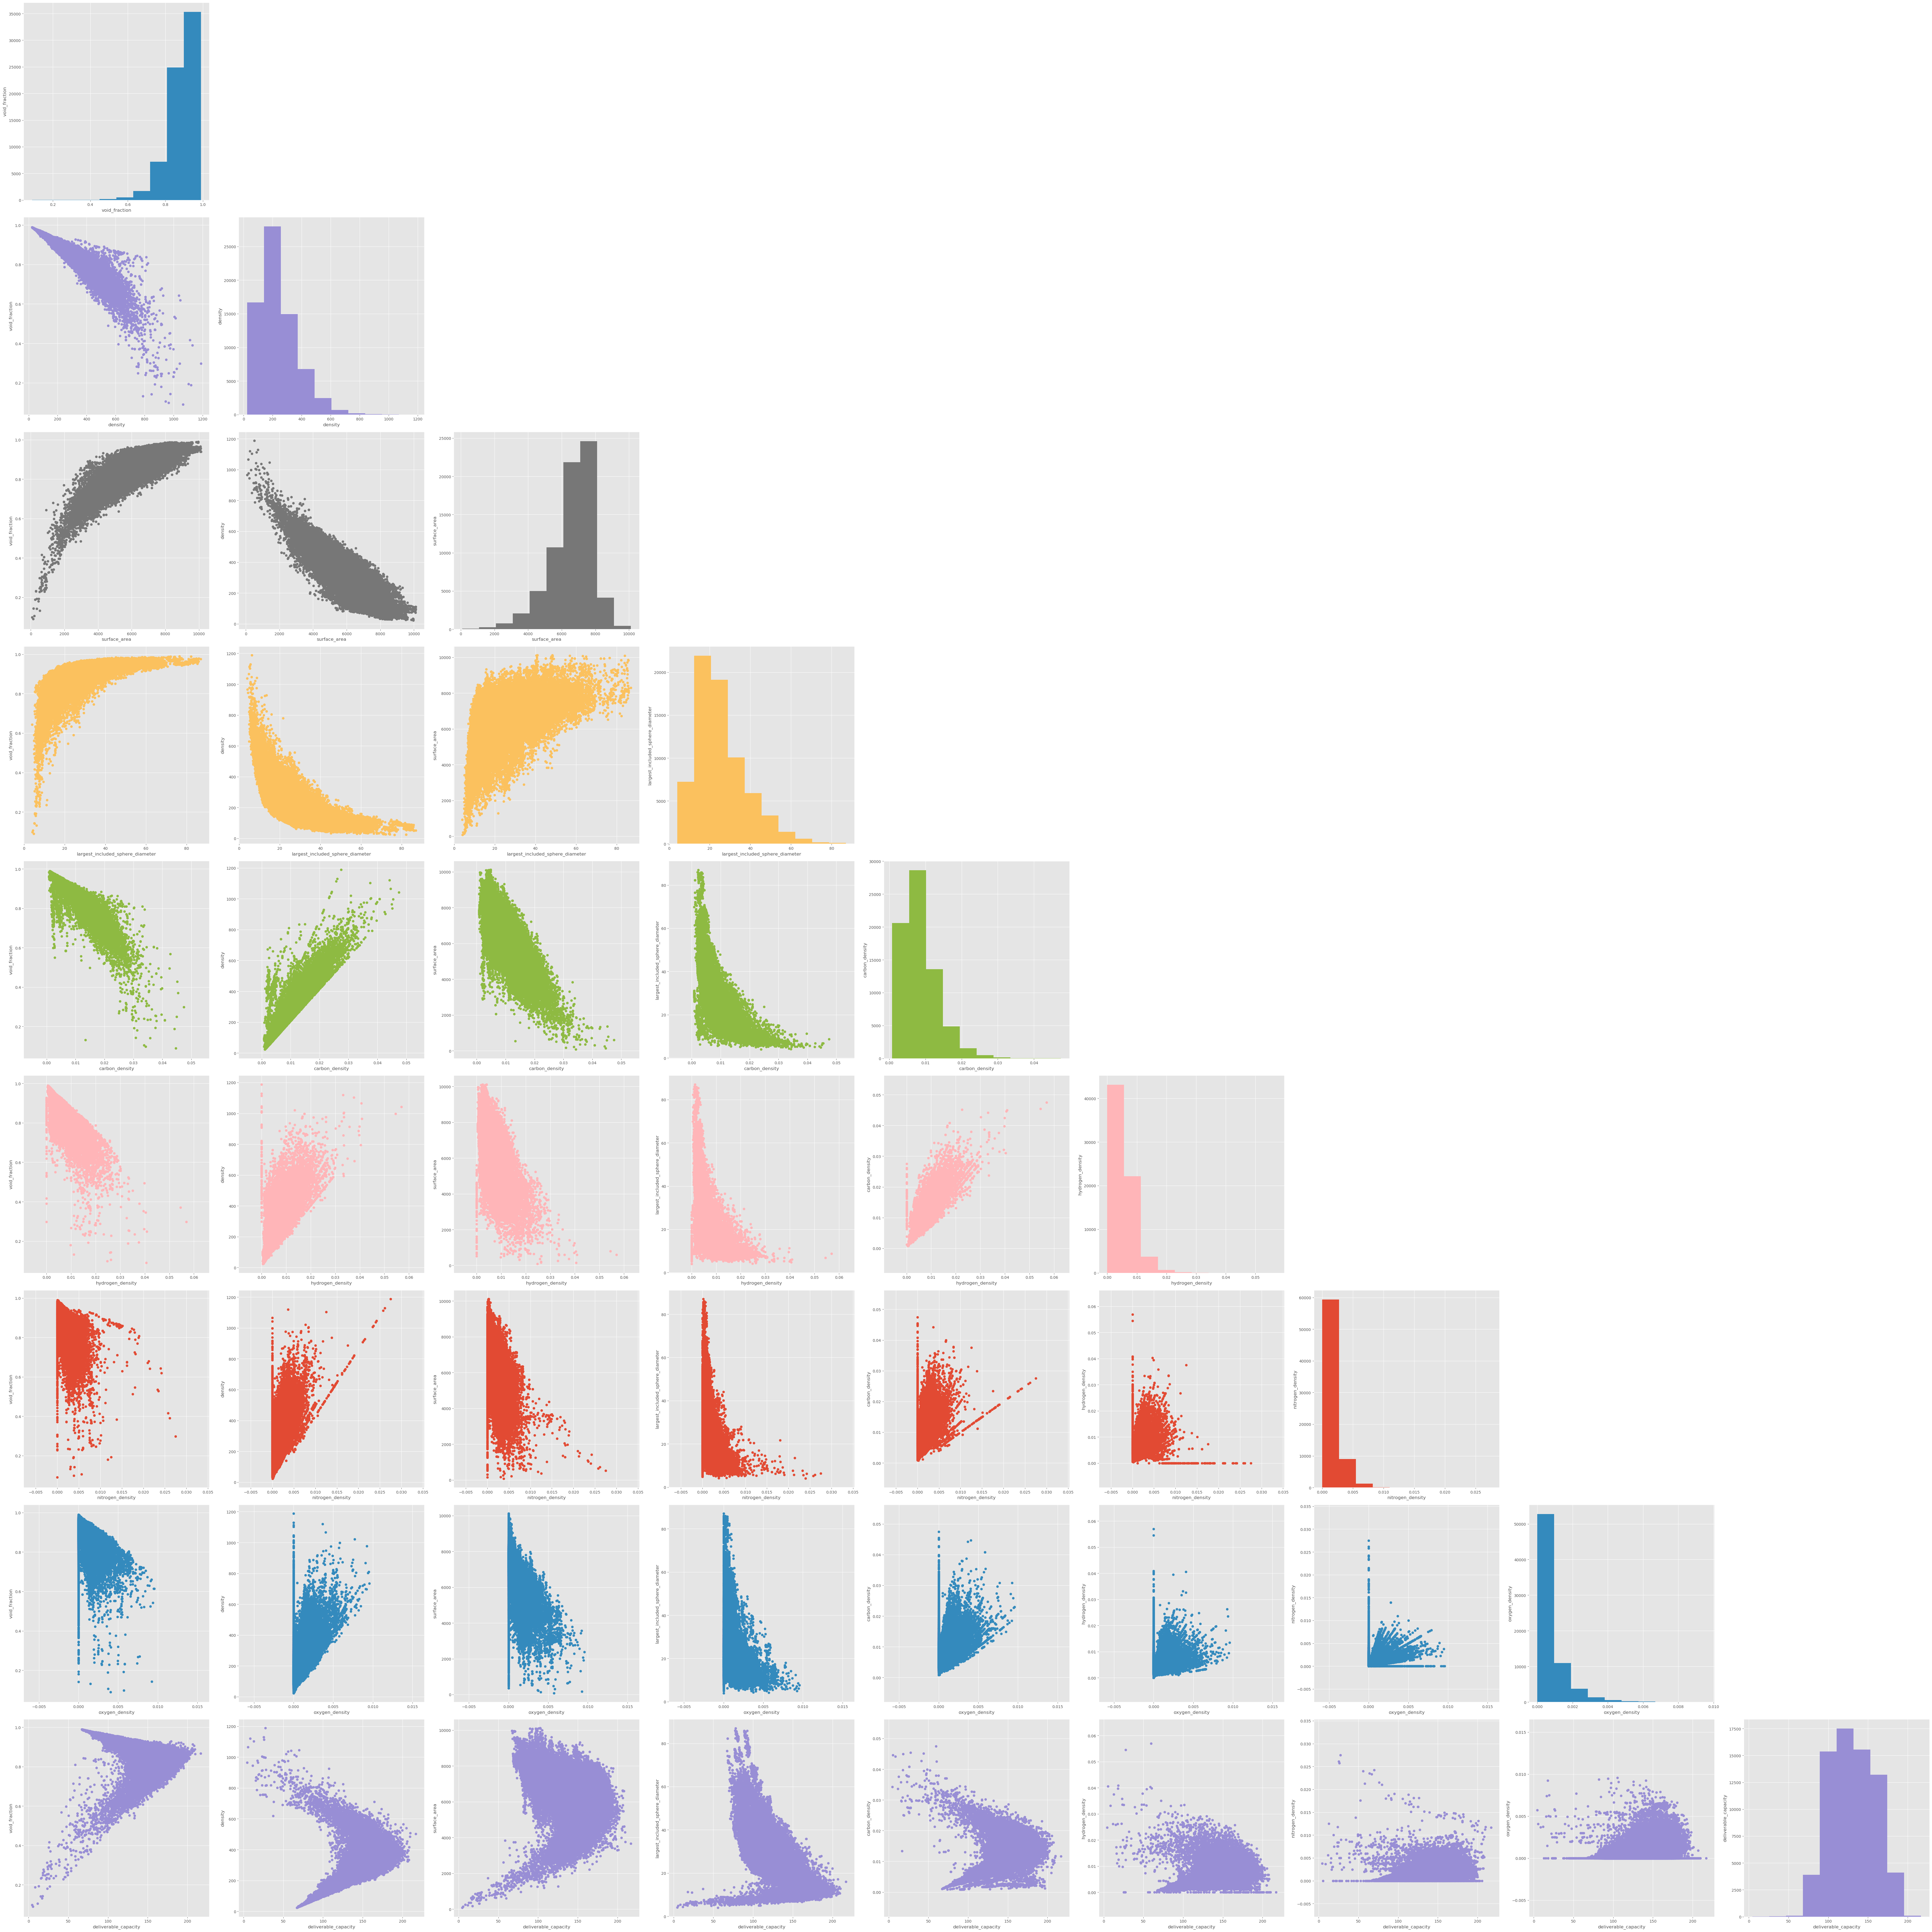

In [9]:
features = [:void_fraction, :density, :surface_area, :largest_included_sphere_diameter
    , :carbon_density, :hydrogen_density, :nitrogen_density, :oxygen_density, :deliverable_capacity]

nb_features = length(features)

fig, axs = subplots(nb_features, nb_features, figsize=(70, 70), 
                    tight_layout=true)

for f_1 = 1:nb_features
    for f_2 = 1:nb_features
        # histograms on diagonal
        if f_1 == f_2
            axs[f_1, f_1].hist(df[:, features[f_1]], color="C$f_2")
            axs[f_1, f_1].set_xlabel(features[f_1])
            axs[f_1, f_1].set_ylabel(features[f_1])
            continue
        end
        if f_2 > f_1
            axs[f_1, f_2].axis("off")
            continue
        end
        # scatter plots
        axs[f_1, f_2].scatter(df[:, features[f_1]], df[:, features[f_2]], color="C$f_1")
        axs[f_1, f_2].set_xlabel(features[f_1])
        axs[f_1, f_2].set_ylabel(features[f_2])
    end
end

# Multiple Linear Regression

$y = \beta_0+\beta_1x_1+\beta_2x_2...+\beta_8x_8$


* $x_1$: Void Fraction (Porosity)
* $x_2$: Density
* $x_3$: Surface Area
* $x_4$: Largest Included Sphere Diameter (Pore Size)
* $x_5$: Desity of Carbon
* $x_6$: Density of Hydrogen
* $x_7$: Denstiy of Nitrogen
* $x_8$: Density of Oxygen
* $y$: Predicted Deliverable Capacity

In [10]:
@sk_import linear_model : LinearRegression
using ScikitLearn.CrossValidation: train_test_split

In [11]:
feature = [:void_fraction, :density, :surface_area, :largest_included_sphere_diameter
    , :carbon_density, :hydrogen_density, :nitrogen_density, :oxygen_density]

nb_feature = length(feature)

nb_df = nrow(df)
X = zeros(nb_df, nb_feature)
y = df[:, :deliverable_capacity]

for (i, d) in enumerate(eachrow(df))
    y[i] = d[:deliverable_capacity]
    for f = 1:nb_feature
        X[i, f] = d[features[f]]
    end
end

# 80/20 train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=true)
        
reg = LinearRegression()
reg.fit(X_train, y_train)
println("intercept: ", reg.intercept_)
println("coeff.: ", reg.coef_)

R²= reg.score(X_test, y_test) # R²
ŷ = reg.predict(X_test)
y_test # truth

mse = sum((ŷ .- y_test) .^2)/length(y_test)
rmse = sqrt(mse)

println("R²= ", R²)
println("MSE= ", mse)
println("RMSE= ", rmse)

intercept: -427.9723215884104
coeff.: [518.9924140126325, 0.37541243514141936, 0.0041156466104502725, -0.9009597197558443, -1004.0516466908293, 3256.1388512355325, -1284.5876497923095, -549.5539261288217]
R²= 0.7206463919126351
MSE= 216.1555936153083
RMSE= 14.702230906066886


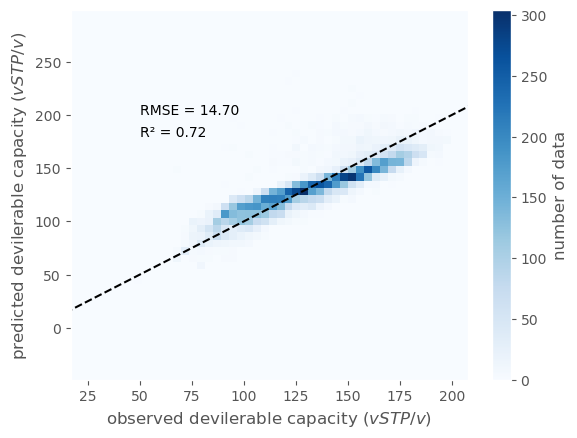

PyObject Text(29.00000000000002, 0.5, 'predicted devilerable capacity ($v STP/v$)')

In [12]:
figure()
hist2D(y_test, ŷ, bins=50, cmap="Blues") 
colorbar(label="number of data")
plot([0, 300], [0, 300], color="k", linestyle="--")
text(50, 200, @sprintf("RMSE = %.2f", rmse))
text(50, 180, @sprintf("R² = %.2f", R²))
xlabel(L"observed devilerable capacity ($v STP/v$)")
ylabel(L"predicted devilerable capacity ($v STP/v$)")

## Standardize the Data to Compare Coefficient

$Z_i = \frac{x_i-\bar{x}}{s}$

* $z_i$: z-score standardized variables
* $x_i$: a data point
* $\bar{x}$: the sample mean$
* $s$: the sample standar deviation

In [13]:
for (i, d) in enumerate(eachrow(df))
    y[i] = d[:deliverable_capacity]
    for f = 1:nb_feature
        X[i, f] = d[features[f]]
        X[i, f] = (d[features[f]]-mean(df[:, features[f]]))/std(df[:, features[f]])
    end
end
X

69839×8 Array{Float64,2}:
   1.45227  -1.66503   2.64011   4.16514  -1.58335  -1.44678  -1.12287   -0.671735
   1.45034  -1.66503   2.64011   4.16514  -1.58335  -1.44678  -1.12287   -0.671735
   1.43799  -1.64766   2.5436    4.63601  -1.56579  -1.43681  -1.10648   -0.671735
   1.43574  -1.64766   2.5436    4.63601  -1.56579  -1.43681  -1.10648   -0.671735
   1.43324  -1.63829   2.62386   3.81282  -1.54774  -1.42026  -1.12486   -0.671735
   1.42584  -1.63829   2.62386   3.81282  -1.54774  -1.42026  -1.12486   -0.671735
   1.41911  -1.61434   1.30791   3.74366  -1.55349  -1.40253  -1.01511   -0.671735
   1.41839  -1.64705   2.29216   3.98126  -1.57574  -1.3748   -1.12136   -0.626776
   1.4171   -1.64705   2.29216   3.98126  -1.57574  -1.3748   -1.12136   -0.626776
   1.41626  -1.61165   1.30519   3.71924  -1.55056  -1.40021  -1.01336   -0.671735
   1.41553  -1.61276   1.38106   3.72207  -1.53979  -1.38543  -1.05212   -0.671735
   1.4154   -1.62324   1.60754   3.7357   -1.54168  -1.37193 

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=true)
        
reg = LinearRegression()
reg.fit(X_train, y_train)
coeff = reg.coef_
println("intercept: ", reg.intercept_)
println("coeff.: ", coeff)

intercept: 130.7041513724736
coeff.: [37.69529085020397, 49.06930987967993, 5.325995365734345, -10.973428701730404, -5.095972009719851, 10.744415901377723, -2.0857871991711736, -0.7130808872958087]


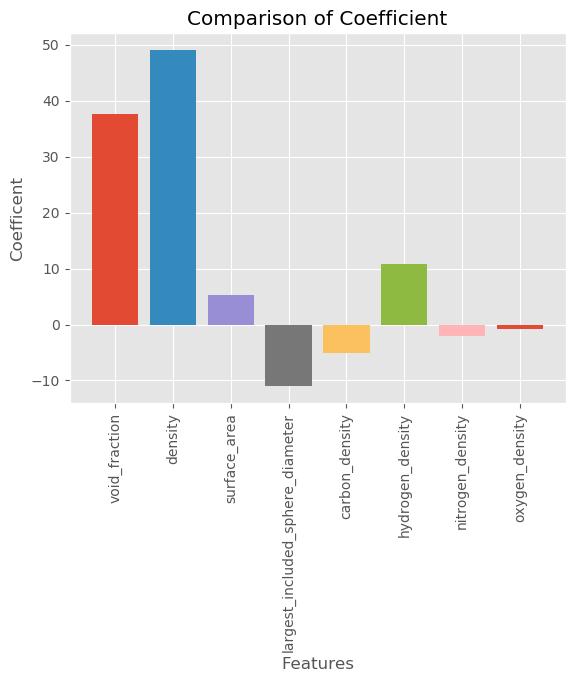

In [15]:
figure()
for i = 1:nb_feature
    bar(i, coeff[i])
    xticks(1:nb_feature, feature, rotation =90)
    xlabel("Features")
    ylabel("Coefficent")
    title("Comparison of Coefficient")
end

## Conclusion
* The most effective feature is the density of the material. The higher density of the material can adsorb more methane in COFs.
* The void fraction (Porosity) has the second high coefficient. It is due to more pore in the material, causing more space to store methane.
* Base on the coefficient of "largest_included_sphere_diameter (pore size)", the coefficient is negative, which indicates the large pore size in COFs will reduce the adsorption of the methane.
* Compared to the densities of carbon, hydrogen, nitrogen, and oxygen, the density of hydrogen has the highest and positive coefficient, which indicates the material with more hydrogens can adsorb more methane.

## Reference
1. Rocío Mercado, Rueih-Sheng Fu, Aliaksandr V. Yakutovich, Leopold TalirzMaciej Haranczyk, Berend Smit, *Chem. Mater.* 2018, 30, 15, 5069-5086